# Práctico 5: Métricas de clasificación

## Objetivos del trabajo

* Objetivo general:
    - Aplicar métricas a dos técnicas de clasificación (Naïve Bayes y Regresión Logística)

* Objetivos específicos:
    - continuar el estudio del dataset de la ECH, en este caso con una variable de respuesta discreta
    - aplicar herramientas de análisis estadístico descriptivo adecuadas al caso
    - aplicar ambas técnicas de clasificación
    
    
## Presentación del caso de estudio

* Predicción del ingreso de las personas:
    - queremos desarrollar un modelo de predicción del acceso a servicio de streaming en los hogares a partir de los datos de la ECH.
    
1. Objetivo:

    * **Tarea (T)**: Predicción de acceso a servicio de streaming en el hogar (la ECH pregunta: "Este hogar, ¿cuenta con acceso a servicio de streaming?")
    * **Entrenamiento (E)**: Utilizamos los datos de la Encuesta Continua de Hogares del INE (ECH) de 2022        
    * **Performance (P)**: buscamos minimizar el error de clasificación: 
    
    $$ E_{D}(l_{0-1}(h,(x, y)),$$ 
    
    $$l_{0-1} (h,(x, y))=$$ 
    
    \begin{cases} 1 & h(x) \neq y \\ 0 & h(x) = y  \end{cases}

2. Links de referencia:

    * [Encuesta Continua de Hogares 2022](https://www.ine.gub.uy/Anda5/index.php/catalog/730/get-microdata) 
    * datos a utilizar: [Base anual ECH 2022](https://www.ine.gub.uy/Anda5/index.php/catalog/730/download/1143)
    * [Diccionario de variables ECH 2022](https://www.ine.gub.uy/Anda5/index.php/catalog/730/data-dictionary)
        
    
3. Entendimiento del caso:

    * Lectura de la documentación de los datos de la ECH
    * Análisis del diccionario de datos de la ECH
    * ¿Cuál es la variable objetivo *Y*?
    * Planteo inicial de hipótesis: Definición del enfoque de uso de variables (no existe receta)
        - de menos a más: variable por variable, probando una hipótesis a la vez, utilizando combinaciones
        - usar todas las variables de una vez

## Setup

In [1]:
#Importar librerías
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split # División del dataset
import matplotlib.pyplot as plt # Plotear
from sklearn.linear_model import LinearRegression # Modelo de ML
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix # Métricas

## Importación del dataset  

In [2]:
#Importar data
df = pd.read_csv(r'ECH_2022.csv')

#df = pd.read_csv(r'ECH implantacion sem1 2022.csv', usecols = [i for i in range(1, 86)])

C:\Users\epastor\AppData\Local\Temp\ipykernel_8036\1851076909.py:2: DtypeWarning: Columns (84,179,278) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'ECH_2022.csv')


In [3]:
df.head()

,ID,nper,anio,mes,GR,region,region_4,dpto,ccz,secc,...,w_tri,w_sem,estred13,nom_dpto,g260,g261,g261_1,w_ano,Loc_agr_13,Nom_loc_agr_13
0,11558,1,2022,1,7,1,1,1,1,4,...,175,87.5,4,MONTEVIDEO,NaN,NaN,NaN,38,1010,Montevideo
1,11559,1,2022,1,7,1,1,1,1,4,...,350,175.0,4,MONTEVIDEO,NaN,NaN,NaN,84,1010,Montevideo
2,11559,2,2022,1,7,1,1,1,1,4,...,350,175.0,4,MONTEVIDEO,NaN,NaN,NaN,84,1010,Montevideo
3,11560,1,2022,1,7,1,1,1,1,4,...,131,65.5,4,MONTEVIDEO,NaN,NaN,NaN,33,1010,Montevideo
4,11561,1,2022,1,7,1,1,1,1,4,...,131,65.5,4,MONTEVIDEO,NaN,NaN,NaN,33,1010,Montevideo


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
#Verificamos las características del dataset
print('Características del dataset:')
print(df.describe())

Características del dataset:
                 ID          nper     anio           mes            GR  \
count  55056.000000  55056.000000  55056.0  55056.000000  55056.000000   
mean   23000.805507      2.080918   2022.0      6.457897     12.457897   
std     6654.507488      1.253577      0.0      3.454899      3.454899   
min    11558.000000      1.000000   2022.0      1.000000      7.000000   
25%    17210.750000      1.000000   2022.0      3.000000      9.000000   
50%    22926.000000      2.000000   2022.0      6.000000     12.000000   
75%    28787.000000      3.000000   2022.0      9.000000     15.000000   
max    34503.000000     12.000000   2022.0     12.000000     18.000000   

             region      region_4          dpto           ccz          secc  \
count  55056.000000  55056.000000  55056.000000  55056.000000  55056.000000   
mean       1.811101      1.863503      6.152517      3.183413     13.243952   
std        0.715584      0.828443      5.779517      5.073693     1

In [6]:
columns = df.columns.values.tolist()
print(columns)

['ID', 'nper', 'anio', 'mes', 'GR', 'region', 'region_4', 'dpto', 'ccz', 'secc', 'segm', 'barrio', 'c1', 'c2', 'c3', 'c4', 'c6', 'c6_1', 'd8_1', 'd8_2', 'd8_3', 'd8_4', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15', 'd16', 'd18', 'd260', 'd19', 'd20', 'd21_1', 'd21_2', 'd21_3', 'd21_6', 'd21_4', 'd21_4_1', 'd21_5', 'd21_5_1', 'd21_20', 'd21_7', 'd21_10', 'd21_11', 'd21_12', 'd21_13', 'd21_14', 'd21_14_1', 'd21_15', 'd21_15_1', 'd21_15_2', 'd21_15_3', 'd21_15_4', 'd21_15_5', 'd21_15_6', 'd21_16', 'd21_16_1', 'd21_16_2', 'd21_21', 'd21_17', 'd21_18', 'd21_18_1', 'd21_19', 'd21_19_1', 'd181', 'd229', 'd230', 'd231', 'd232', 'd184', 'd184_1', 'd23', 'd24', 'd25', 'e557', 'e26', 'e27', 'e29_1', 'e29_2', 'e29_3', 'e29_4', 'e29_5', 'e29_5_1', 'e29_6', 'e30', 'e31', 'e31_1', 'e32', 'e32_1', 'e33', 'e34', 'e35', 'e36', 'e185', 'e186_1', 'e186_2', 'e186_3', 'e186_4', 'e37', 'e37_2', 'e234_2', 'e38', 'e38_1', 'e39', 'e39_2', 'e235_2', 'e236', 'e236_2', 'e236_4', 'e45_cv', 'e45_1_1_cv', 'e45_1_1_

* Observamos bajo qué tipo de dato fueron importadas las variables que por definición serían numéricas o categóricas
    - en caso de no cumplirse lo necesario, se deberán realizar transformaciones

In [7]:
# identificador del hogar
df['ID'].dtype

dtype('int64')

In [8]:
df['ID'].describe()

count    55056.000000
mean     23000.805507
std       6654.507488
min      11558.000000
25%      17210.750000
50%      22926.000000
75%      28787.000000
max      34503.000000
Name: ID, dtype: float64

In [9]:
# edad
df['e27'].dtype

dtype('int64')

In [10]:
# sexo
df['e26'].dtype

dtype('int64')

## Preparación de los datos

**Tarea 3.1: incorporar variables independientes de interés (además de las sugeridas a continuación) de acuerdo a las hipótesis del equipo de trabajo.**

In [11]:
df_hogar = pd.DataFrame()

# identificador del hogar: lo precisamos inicialmente ya que las observaciones corresponden a personas (una o más por hogar)
df_hogar['id_hogar'] = df['ID'].astype('object')

# características del hogar
df_hogar['departamento'] = df['dpto'].astype('category')
df_hogar['tipo_vivienda'] = df['c1'].astype('category')
df_hogar['material_paredes'] = df['c2'].astype('category')
df_hogar['material_techo'] = df['c3'].astype('category')
df_hogar['material_pisos'] = df['c4'].astype('category')
df_hogar['tenencia_vivienda'] = df['d8_1'].astype('category')
df_hogar['nro_habitaciones'] = df['d9'].astype('int64')

# variable de respuesta
df_hogar['acceso_streaming'] = df['d21_21'].astype('category')

In [12]:
df_hogar.head(20)

,id_hogar,departamento,tipo_vivienda,material_paredes,material_techo,material_pisos,tenencia_vivienda,nro_habitaciones,acceso_streaming
0,11558,1,3,1,1,1,2,3,1
1,11559,1,3,1,1,1,5,3,1
2,11559,1,3,1,1,1,5,3,1
3,11560,1,3,1,1,1,2,2,1
4,11561,1,3,1,1,1,2,5,1
5,11562,1,5,1,1,1,5,1,2
6,11563,1,3,1,1,1,5,2,2
7,11564,1,3,1,1,1,1,4,1
8,11564,1,3,1,1,1,1,4,1
9,11564,1,3,1,1,1,1,4,1


* Se debe llevar al dataset a una observación por hogar

In [13]:
df_hogar['id_hogar'].describe()

count     55056
unique    22895
top       15772
freq         12
Name: id_hogar, dtype: int64

In [14]:
df_hogar = df_hogar.drop_duplicates() # podemos utilizar esta función ya que la única repetida sería id_hogar

In [15]:
df_hogar.head(20)

,id_hogar,departamento,tipo_vivienda,material_paredes,material_techo,material_pisos,tenencia_vivienda,nro_habitaciones,acceso_streaming
0,11558,1,3,1,1,1,2,3,1
1,11559,1,3,1,1,1,5,3,1
3,11560,1,3,1,1,1,2,2,1
4,11561,1,3,1,1,1,2,5,1
5,11562,1,5,1,1,1,5,1,2
6,11563,1,3,1,1,1,5,2,2
7,11564,1,3,1,1,1,1,4,1
12,11565,1,3,1,1,1,5,2,1
13,11566,1,3,1,1,1,5,2,1
15,11567,1,3,1,1,1,2,3,1


In [16]:
# verificamos que haya tantos valores únicos como observaciones
df_hogar['id_hogar'].describe()

count     22895
unique    22895
top       11558
freq          1
Name: id_hogar, dtype: int64

In [17]:
# descartamos id_hogar (no es de interés a los efectos del aprendizaje)
df_hogar = df_hogar.drop(['id_hogar'], axis=1)

## Análisis estadístico descriptivo y transformaciones de variables

Estructura del dataset

In [18]:
df_hogar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22895 entries, 0 to 55053
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   departamento       22895 non-null  category
 1   tipo_vivienda      22895 non-null  category
 2   material_paredes   22895 non-null  category
 3   material_techo     22895 non-null  category
 4   material_pisos     22895 non-null  category
 5   tenencia_vivienda  22895 non-null  category
 6   nro_habitaciones   22895 non-null  int64   
 7   acceso_streaming   22895 non-null  category
dtypes: category(7), int64(1)
memory usage: 516.3 KB


In [19]:
df_hogar.describe()

,nro_habitaciones
count,22895.000000
mean,3.395938
std,1.175145
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,14.000000


In [20]:
pd.isnull(df_hogar).describe()

,departamento,tipo_vivienda,material_paredes,material_techo,material_pisos,tenencia_vivienda,nro_habitaciones,acceso_streaming
count,22895,22895,22895,22895,22895,22895,22895,22895
unique,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False
freq,22895,22895,22895,22895,22895,22895,22895,22895


* Variable de respuesta

    - d21_21 - Acceso a servicio de streaming: 1 = Sí / 2 = No
    - Una alternativa para resolver nuestro problema puede ser transformar variables categóricas en booleanas, siempre que la variable tenga dos categorías o que se quiera reducir la cantidad de categorías a dos (y que esto sea adecuado al objetivo del problema).
    - Optamos por mantener la variable original y crear una nueva variable auxiliar transformada.

In [21]:
#Número de observaciones por clase
df_hogar.acceso_streaming.value_counts().sort_index()

1     7641
2    15254
Name: acceso_streaming, dtype: int64

In [22]:
df_hogar['aux_acceso_streaming'] =  np.where(df_hogar['acceso_streaming']== 1, True, False)
df_hogar['aux_acceso_streaming'].describe()

count     22895
unique        2
top       False
freq      15254
Name: aux_acceso_streaming, dtype: object

In [23]:
df_hogar.head()

,departamento,tipo_vivienda,material_paredes,material_techo,material_pisos,tenencia_vivienda,nro_habitaciones,acceso_streaming,aux_acceso_streaming
0,1,3,1,1,1,2,3,1,True
1,1,3,1,1,1,5,3,1,True
3,1,3,1,1,1,2,2,1,True
4,1,3,1,1,1,2,5,1,True
5,1,5,1,1,1,5,1,2,False


**Tarea 3.2: completamos AED; evaluar y llegado el caso implementar transformaciones de variables independientes**

Respuesta 2.2: insertar celdas a continuación

## Partición del dataset: Train y Test

In [24]:
y = df_hogar['aux_acceso_streaming']
y

0         True
1         True
3         True
4         True
5        False
         ...  
55046    False
55047    False
55050    False
55051    False
55053    False
Name: aux_acceso_streaming, Length: 22895, dtype: bool

In [25]:
x = df_hogar[df_hogar.columns.difference(['acceso_streaming', 'aux_acceso_streaming'])]
x

,departamento,material_paredes,material_pisos,material_techo,nro_habitaciones,tenencia_vivienda,tipo_vivienda
0,1,1,1,1,3,2,3
1,1,1,1,1,3,5,3
3,1,1,1,1,2,2,3
4,1,1,1,1,5,2,3
5,1,1,1,1,1,5,5
...,...,...,...,...,...,...,...
55046,19,1,3,3,2,5,1
55047,19,1,1,3,2,8,1
55050,19,1,3,5,2,2,1
55051,19,1,1,3,4,2,1


In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                   random_state=104, 
                                   test_size=0.20, 
                                   shuffle=True)

In [27]:
print("Cantidad de observaciones total: {0}".format(len(x)))
print("Cantidad de observaciones en train: {0}".format(len(X_train)))
print("Cantidad de observaciones en test: {0}".format(len(X_test)))

Cantidad de observaciones total: 22895
Cantidad de observaciones en train: 18316
Cantidad de observaciones en test: 4579


## Modelos
Ahora queremos entrenar algunos modelos en el conjunto de entrenamiento y evaluar su rendimiento en el conjunto de prueba. 

### 1 - Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB

#Defino el modelo
modelo_naive_bayes = MultinomialNB()

#Entreno el modelo
modelo_naive_bayes.fit(X_train, y_train)

#Predicciones del modelo
y_pred_NB = modelo_naive_bayes.predict(X_test)

### 2- Regresión logística

In [29]:
from sklearn.linear_model import LogisticRegression

#Defino el modelo
regresion_logistica = LogisticRegression()

#Entreno el modelo
regresion_logistica.fit(X_train, y_train)

#Predicciones del modelo
y_pred_RL = regresion_logistica.predict(X_test)

## Métricas

### Análisis de los resultados
Verifiquemos como es el modelo utilizando las métricas de los problemas de clasificación, para ello vamos a comenzar obteniendo la matriz de confusión. Para esto importamos del módulo scikitlearn.metrics, confusion_matrix, y aplicamos esta instrucción junto a los datos de prueba y los obtenidos en la predicción realizada previamente. 

### 1- Naive Bayes

In [30]:
#Error de clasificación
(y_pred_NB != y_test).sum()/y_test.shape[0]

0.3293295479362306

In [31]:
#Calculo la matriz de Confusión
matriz_NB = confusion_matrix(y_test, y_pred_NB)
print('Matriz de Confusión:')
print(matriz_NB)

Matriz de Confusión:
[[2091  927]
 [ 581  980]]


In [32]:
(matriz_NB[0,1] + matriz_NB[1,0]) / (matriz_NB[0,0] + matriz_NB[0,1] + matriz_NB[1,0] + matriz_NB[1,1])

0.3293295479362306

In [33]:
#Calculo la precisión del modelo
precision_NB = precision_score(y_test, y_pred_NB)
print('Precisión del modelo: %.3f' % precision_NB)

Precisión del modelo: 0.514


In [34]:
#Calculo Accuracy del modelo
accuracy_NB = accuracy_score(y_test, y_pred_NB)
print('Accuracy del modelo: %.3f' % accuracy_NB)

Accuracy del modelo: 0.671


In [35]:
#Calculo Recall del modelo
recall_NB = recall_score(y_test, y_pred_NB)
print('Recall del modelo: %.3f' % recall_NB)

Recall del modelo: 0.628


In [36]:
#Calculo F1 score del modelo
f1_NB = f1_score(y_test, y_pred_NB)
print('F1 del modelo: %.3f' % f1_NB)

F1 del modelo: 0.565


### 2- Regresión logística

In [37]:
#Calculo la Matriz de Confusión
matriz_RL = confusion_matrix(y_test, y_pred_RL)
print('Matriz de Confusión:')
print(matriz_RL)

Matriz de Confusión:
[[2656  362]
 [ 957  604]]


In [38]:
#Calculo la precisión del modelo
precision_RL = precision_score(y_test, y_pred_RL)
print('Precisión del modelo: %.3f' % precision_RL)

Precisión del modelo: 0.625


In [39]:
#Calculo Accuracy del modelo
accuracy_RL = accuracy_score(y_test, y_pred_RL)
print('Accuracy del modelo: %.3f' % accuracy_RL)

Accuracy del modelo: 0.712


In [40]:
#Calculo Recall del modelo
recall_RL = recall_score(y_test, y_pred_RL)
print('Recall del modelo: %.3f' % recall_RL)

Recall del modelo: 0.387


In [41]:
#Calculo F1 score del modelo
f1_RL = f1_score(y_test, y_pred_RL)
print('F1 del modelo: %.3f' % f1_RL)

F1 del modelo: 0.478


### Comparación

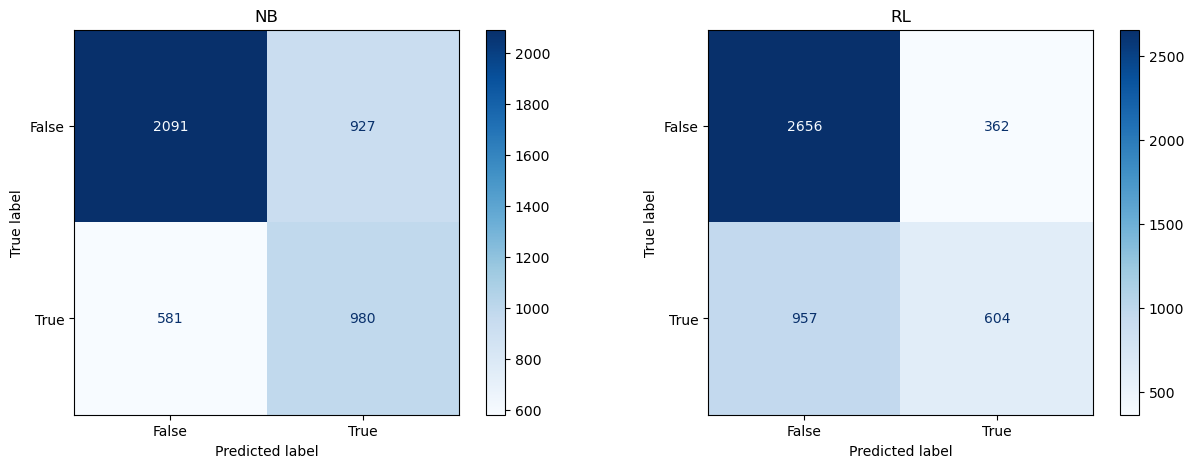

In [42]:
#Ploteo la Matriz de Confusión
fig, ax = plt.subplots(1,2, figsize=(15, 5))
ax[0].set_title("NB")
ax[1].set_title("RL")

metrics.ConfusionMatrixDisplay(
    confusion_matrix =metrics.confusion_matrix(y_test, y_pred_NB), 
    display_labels = [False, True]).plot(ax=ax[0], cmap='Blues')

metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(y_test, y_pred_RL), 
    display_labels = [False, True]).plot(ax=ax[1], cmap='Blues')

## Resumen

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

resultados =[]

classifiers = [GaussianNB(), LogisticRegression()]

for model in classifiers:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    resultados.extend((precision, accuracy, recall, f1))

In [44]:
resultados_NB = []
resultados_RL = []

resultados_NB.append(precision_NB)
resultados_NB.append(accuracy_NB)
resultados_NB.append(recall_NB)
resultados_NB.append(f1_NB)

resultados_RL.append(precision_RL)
resultados_RL.append(accuracy_RL)
resultados_RL.append(recall_RL)
resultados_RL.append(f1_RL)

In [45]:
resultados = pd.DataFrame(
    {'Resultados NB': resultados_NB,
     'Resultados RL': resultados_RL,
    })

resultados = resultados.rename(index={0: 'precision', 1: 'accuracy', 2: 'recall', 3: 'f1'})
print(resultados)

           Resultados NB  Resultados RL
precision       0.513896       0.625259
accuracy        0.670670       0.711946
recall          0.627803       0.386931
f1              0.565167       0.478037


**Tarea 3.3: Discutir los resultados de las métricas entre modelos y al agregar nuevas variables. Analice los diferentes resultados y seleccione el modelo y la métrica que considere obtiene mejores resultados en test. ¿Qué métrica seleccionaría de acuerdo a las hipótesis del equipo de trabajo?**